In [1]:
import tensorflow as tf
from tensorflow import keras
from random import shuffle
import numpy as np
import csv

In [24]:
dict = {
    0: "Rock",
    1: "Paper",
    2: "Scissors"
}

In [39]:
input_sequences = []
labels = []

maxlen = 6
split = 0.7

with open('../data/collected.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)

    next(reader)

    for row in reader:
        inputs = [int(char) for char in row[2]]
        for i in range(1, len(inputs)+1):
            input_sequences.append(inputs[:i+1])


In [40]:
input_sequences = keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=maxlen+1)

inputs,labels = input_sequences[:,:-1], input_sequences[:,-1]

labels = labels-1

In [44]:
inputs, labels

(array([[0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 3, 2],
        [0, 0, 0, 3, 2, 2],
        ...,
        [3, 3, 3, 2, 2, 1],
        [3, 3, 2, 2, 1, 1],
        [3, 3, 2, 2, 1, 1]]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2,
        2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0,
        1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1,
        1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2,
        2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0,
        0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
        1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1,
        1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0,
        1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1,
        2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0,
   

In [45]:
train_size = int(split * len(inputs))
valid_size = int(((1+split)/2) * len(inputs))

training_data, training_labels = inputs[:train_size], labels[:train_size]
valid_data, valid_labels = inputs[train_size:valid_size], labels[train_size:valid_size]
test_data, test_labels = inputs[valid_size:], labels[valid_size:]

In [46]:
print(f"Training data: {training_data.shape}, {training_labels.shape}")
print(f"Validation data: {valid_data.shape}, {valid_labels.shape}")
print(f"Test data: {test_data.shape}, {test_labels.shape}")

Training data: (454, 6), (454,)
Validation data: (97, 6), (97,)
Test data: (98, 6), (98,)


In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(200, return_sequences=True, input_shape=(maxlen, 1)),
    tf.keras.layers.LSTM(200),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [55]:
optimizer=tf.keras.optimizers.SGD(learning_rate=5e-5, momentum=0.9)

In [56]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(training_data, training_labels, epochs=50, batch_size=4, verbose=1, shuffle=True, validation_data=(valid_data, valid_labels))

Epoch 1/50
114/114 [==============================] - 11s 36ms/step - loss: 1.0987 - accuracy: 0.3348 - val_loss: 1.0987 - val_accuracy: 0.3505
Epoch 2/50
114/114 [==============================] - 3s 23ms/step - loss: 1.0987 - accuracy: 0.3216 - val_loss: 1.0991 - val_accuracy: 0.3299
Epoch 3/50
114/114 [==============================] - 3s 26ms/step - loss: 1.0985 - accuracy: 0.3370 - val_loss: 1.0995 - val_accuracy: 0.2680
Epoch 4/50
114/114 [==============================] - 3s 29ms/step - loss: 1.0985 - accuracy: 0.3458 - val_loss: 1.0997 - val_accuracy: 0.2680
Epoch 5/50
114/114 [==============================] - 3s 24ms/step - loss: 1.0984 - accuracy: 0.3436 - val_loss: 1.1002 - val_accuracy: 0.2474
Epoch 6/50
114/114 [==============================] - 4s 32ms/step - loss: 1.0984 - accuracy: 0.3480 - val_loss: 1.1003 - val_accuracy: 0.2474
Epoch 7/50
114/114 [==============================] - 3s 29ms/step - loss: 1.0984 - accuracy: 0.3370 - val_loss: 1.1005 - val_accuracy: 0.237

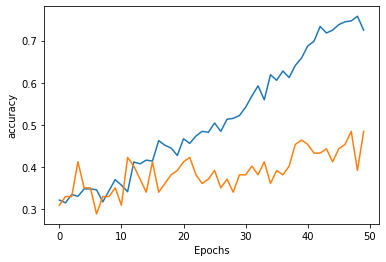

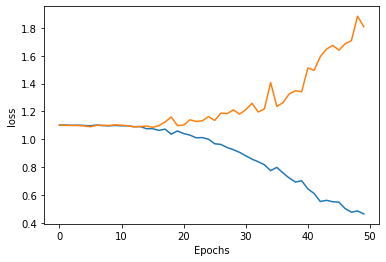

In [34]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [35]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 15ms/step - loss: 2.9426 - accuracy: 0.3265


[2.9425952434539795, 0.3265306055545807]

In [63]:
model.save('../models/test_lstm.h5')